# Second Draft Code

## Import Libraries

In [67]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Read csv Data Files

In [68]:
def readCSV():
    raw_data = pd.read_csv('keystats_with_lable.csv')
    return raw_data
raw_data = readCSV()
raw_data.head()

,Date,Unix,Ticker,Price,stock_p_change,SP500,SP500_p_change,Market Cap,Enterprise Value,Trailing P/E,...,Shares Outstanding,Float,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior month,Unnamed: 48,Label
0,1/30/04 19:01,1075460462,a,22.984629,-41.37,84.478371,5.46,1.745000e+10,1.652000e+10,NaN,...,476150000.0,428500000.0,10.01,63.03,9300000.0,3.923,2.17,6930000.0,NaN,Yes
1,4/13/04 4:07,1081800431,a,19.336773,-32.89,84.572807,5.64,1.532000e+10,1.477000e+10,NaN,...,480750000.0,432700000.0,10.00,66.79,7520000.0,2.328,1.74,9170000.0,NaN,Yes
2,12/13/04 21:37,1102945054,a,14.865800,50.92,90.894150,7.57,1.161000e+10,1.037000e+10,33.58,...,487000000.0,389600000.0,20.00,66.68,6930000.0,2.638,1.78,6540000.0,NaN,Yes
3,1/22/05 5:17,1106342239,a,13.593730,57.11,88.599785,9.77,1.071000e+10,9.760000e+09,30.70,...,491070000.0,441400000.0,10.12,67.08,7040000.0,2.385,1.60,6930000.0,NaN,Yes
4,1/9/06 2:35,1136745316,a,21.544186,4.47,99.419518,11.58,1.712000e+10,1.487000e+10,52.82,...,494180000.0,NaN,0.57,70.40,10980000.0,2.300,2.20,5840000.0,NaN,Yes


## Chose features in the data

In [69]:
columns_names = list(raw_data)
columns_names

['Date',
 'Unix',
 'Ticker',
 'Price',
 'stock_p_change',
 'SP500',
 'SP500_p_change',
 'Market Cap',
 'Enterprise Value',
 'Trailing P/E',
 'Forward P/E',
 'PEG Ratio',
 'Price/Sales',
 'Price/Book',
 'Enterprise Value/Revenue',
 'Enterprise Value/EBITDA',
 'Profit Margin',
 'Operating Margin',
 'Return on Assets',
 'Return on Equity',
 'Revenue',
 'Revenue Per Share',
 'Qtrly Revenue Growth',
 'Gross Profit',
 'EBITDA',
 'Net Income Avl to Common',
 'Diluted EPS',
 'Qtrly Earnings Growth',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 'Operating Cash Flow',
 'Levered Free Cash Flow',
 'Beta',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Shares Outstanding',
 'Float',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (as of',
 'Short Ratio',
 'Short % of Float',
 'Shares Short (prior month',
 'Unnamed: 48',
 'Label']

In [70]:
def chose_features():
    features = [
 'Trailing P/E',
 'Forward P/E',
 'PEG Ratio',
 'Price/Sales',
 'Price/Book',
 'Enterprise Value/Revenue',
 'Enterprise Value/EBITDA',
 'Profit Margin',
 'Operating Margin',
 'Return on Assets',
 'Return on Equity',
 'Revenue Per Share',
 'Qtrly Revenue Growth', 'EBITDA',
 'Net Income Avl to Common',
 'Diluted EPS',
 'Qtrly Earnings Growth',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 'Operating Cash Flow',
 'Levered Free Cash Flow',
 'Beta',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Shares Outstanding',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (as of',
 'Short Ratio',
 'Short % of Float','Label']
    selected_columns_data = raw_data[features]
    return features,selected_columns_data
features,selected_columns_data = chose_features()
# selected_columns_data.head()
selected_columns_data.shape

(4561, 36)

## Label 1 and 0

In [86]:
df = selected_columns_data.dropna()
df['Label'] = df['Label'].map({'Yes': 1, 'No': 0})

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Handle Missing Data

In [87]:
# df.head()
df = df.dropna()
df.head()

,Trailing P/E,Forward P/E,PEG Ratio,Price/Sales,Price/Book,Enterprise Value/Revenue,Enterprise Value/EBITDA,Profit Margin,Operating Margin,Return on Assets,...,50-Day Moving Average,200-Day Moving Average,Avg Vol (3 month),Shares Outstanding,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Label
5,5.08,17.30,1.26,2.53,3.37,2.33,7.549,56.50,9.38,12.15,...,35.3500,35.7200,2766800.0,425820000.0,5.99,74.8,6920000.0,3.4,1.6,0
6,4.63,17.01,1.21,2.54,3.38,2.18,17.215,56.57,8.99,4.54,...,29.2700,34.2000,3040930.0,425820000.0,6.24,72.7,7350000.0,2.5,1.8,1
7,4.33,15.11,1.13,2.68,3.67,2.53,7.322,66.50,11.12,13.70,...,33.0118,32.5942,2657080.0,407110000.0,8.76,67.6,5910000.0,2.8,1.5,1
8,4.62,16.10,1.13,2.77,3.87,2.51,7.275,66.50,11.12,13.70,...,32.7300,33.2600,2840540.0,403650000.0,6.26,72.0,5910000.0,2.8,1.5,1
9,20.47,13.07,1.04,2.25,3.76,2.30,15.421,11.77,11.38,5.17,...,36.3300,36.7500,2459290.0,371470000.0,1.49,73.8,3640000.0,1.9,1.0,1


## Drop Outliners

In [77]:
outlier_idx = np.where(df['Trailing P/E'].values > 300)[0]
df.drop(df.index[outlier_idx],inplace=True)

## Plots

### Scatter plot for each feature

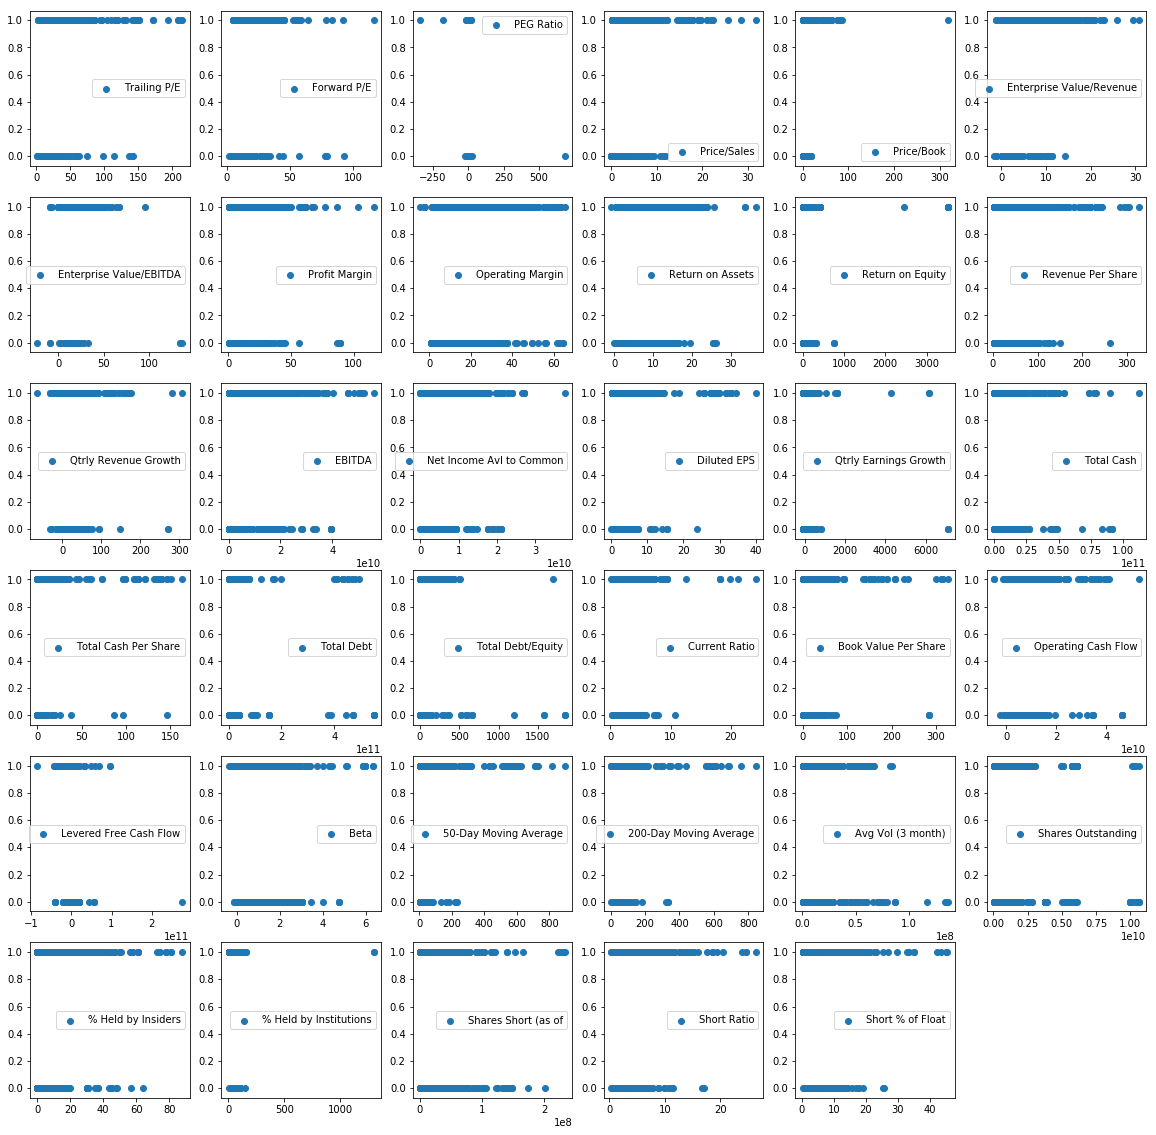

In [78]:
def scatter_plot(df):
    plt.figure(figsize=(20,20))
    for i in range(len(features)-1):
        plt.subplot(6,6,i+1)
        plt.scatter(df[features[i]],df['Label'],label = features[i])
        plt.legend()
scatter_plot(df)

### Distribution Plots for each feature

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

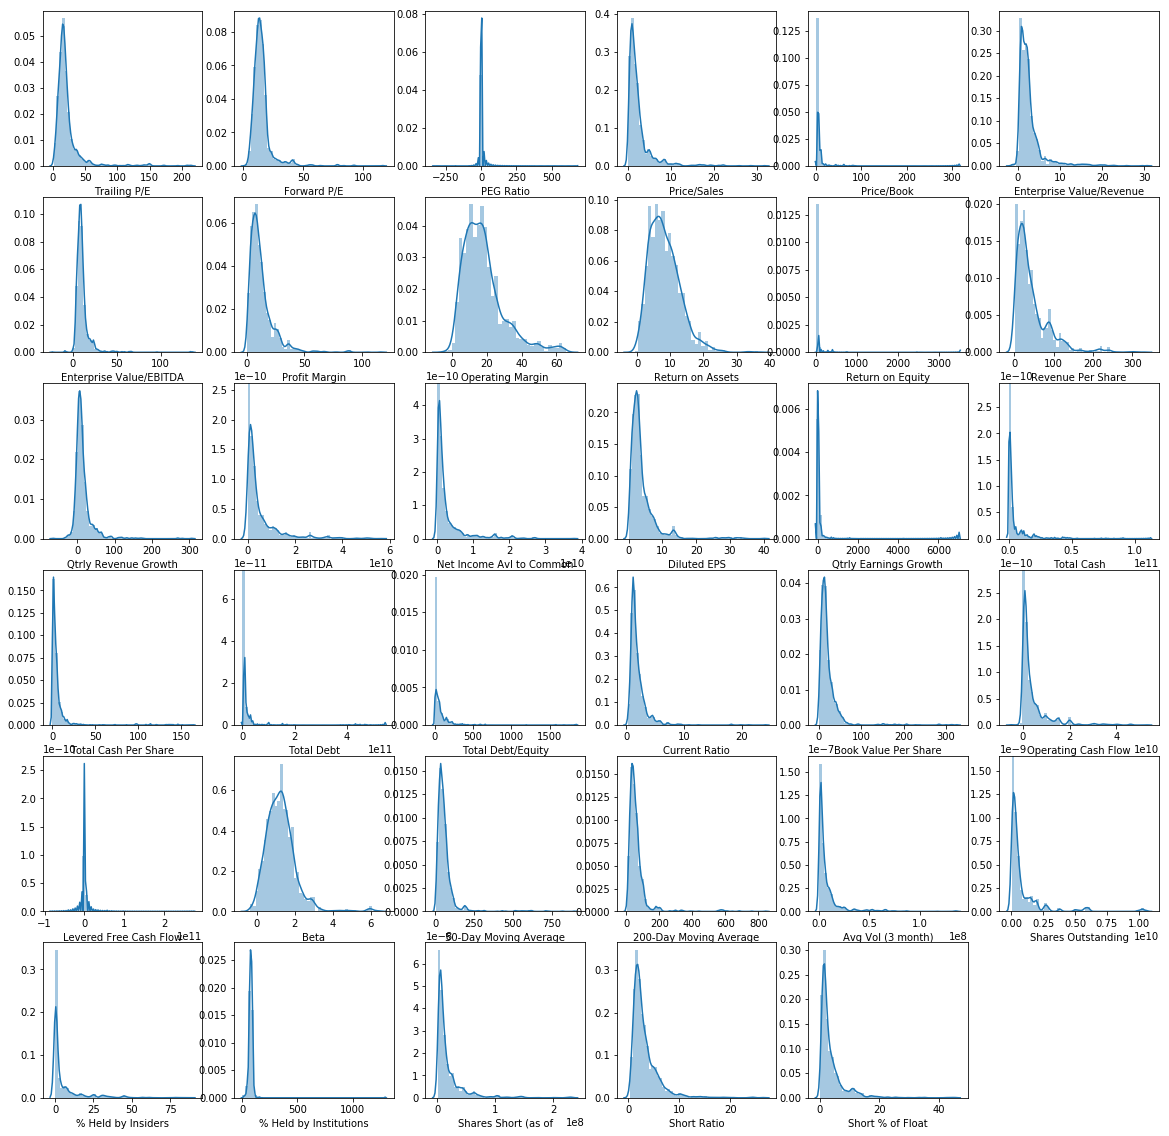

In [79]:
def dis_plot(df, features):
    plt.figure(figsize=(20,20))
    for i in range(len(features)-1):
        plt.subplot(6,6,i+1)
        x = df[features[i]]
        sns.distplot(x)
dis_plot(df,features)

## Feature Engineering

In [80]:
features

['Trailing P/E',
 'Forward P/E',
 'PEG Ratio',
 'Price/Sales',
 'Price/Book',
 'Enterprise Value/Revenue',
 'Enterprise Value/EBITDA',
 'Profit Margin',
 'Operating Margin',
 'Return on Assets',
 'Return on Equity',
 'Revenue Per Share',
 'Qtrly Revenue Growth',
 'EBITDA',
 'Net Income Avl to Common',
 'Diluted EPS',
 'Qtrly Earnings Growth',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 'Operating Cash Flow',
 'Levered Free Cash Flow',
 'Beta',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Shares Outstanding',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (as of',
 'Short Ratio',
 'Short % of Float',
 'Label']

*We normalized in two ways. With/Without log*

### With Log 

In [117]:
skewed = [
 'Profit Margin',
 'Revenue Per Share',
 'EBITDA',
 'Diluted EPS',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Shares Outstanding',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (as of',
 'Short Ratio',
 'Short % of Float']
# skewed = ['Trailing P/E','Forward P/E',]

In [118]:
for feature in skewed:
    print('{}:{}'.format(feature,sum(n < 0 for n in df[feature])))

Profit Margin:0
Revenue Per Share:0
EBITDA:0
Diluted EPS:0
Total Cash:0
Total Cash Per Share:0
Total Debt:0
Total Debt/Equity:0
Current Ratio:0
Book Value Per Share:0
50-Day Moving Average:0
200-Day Moving Average:0
Avg Vol (3 month):0
Shares Outstanding:0
% Held by Insiders:0
% Held by Institutions:0
Shares Short (as of:0
Short Ratio:0
Short % of Float:0


In [123]:
def log_features(df,skewed):
    log_df = df.copy(deep = True)
    log_df[skewed] = log_df[skewed].apply(lambda x: np.log(x + 1))
#     df.replace([np.inf, -np.inf], np.nan)
#     log_df = log_df.dropna()
    return log_df
log_df = log_features(df,skewed)
log_df.shape

(1808, 36)

*Plot the distribution after log transformed*

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

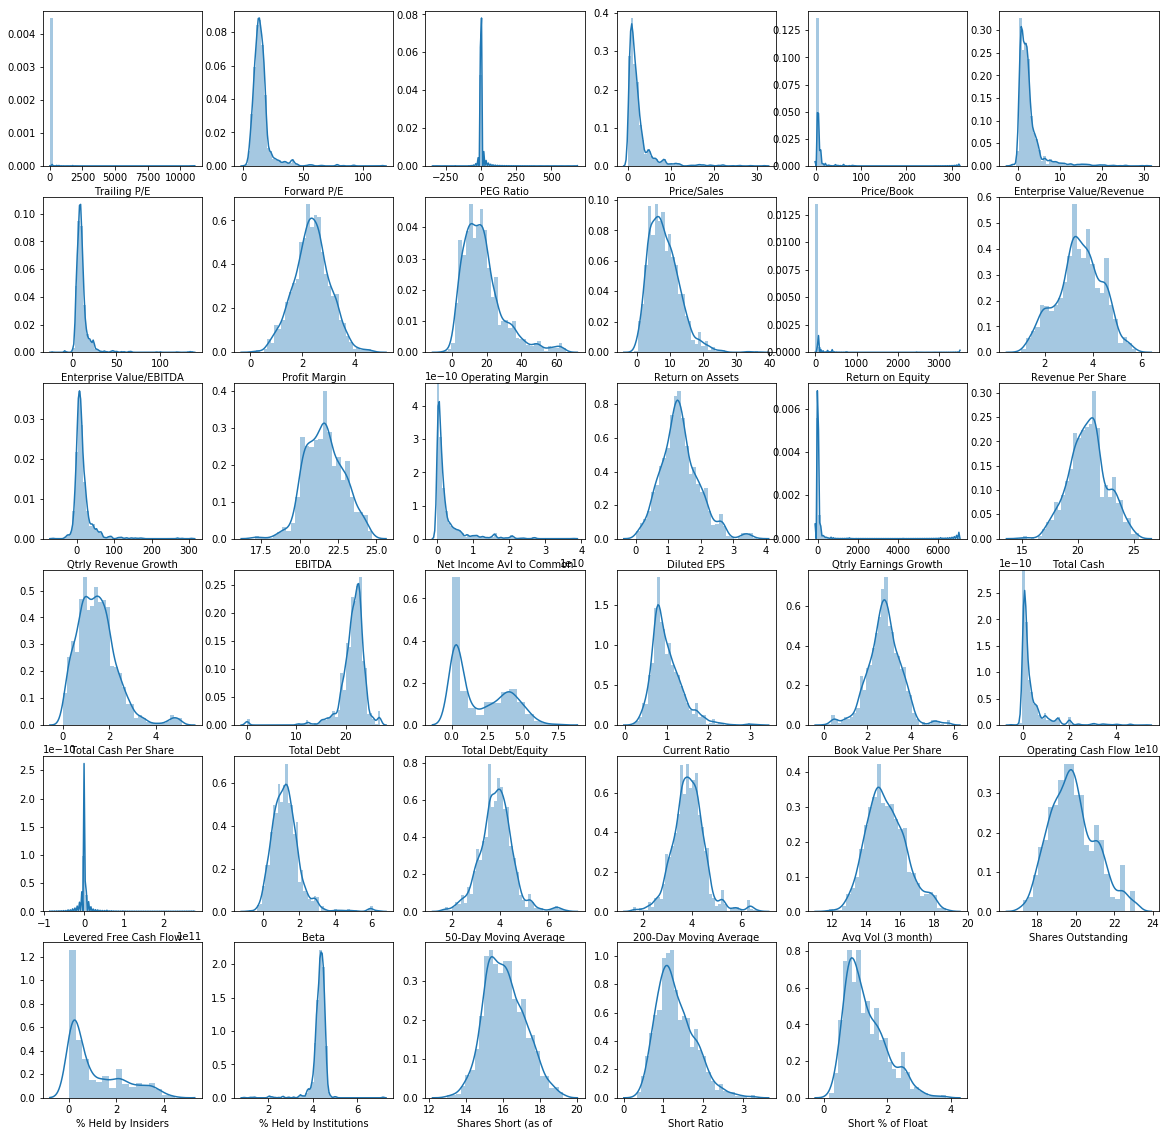

In [121]:
dis_plot(log_df,features)

### Define X and Y matrix

In [158]:
# Original Version Of X
X = np.matrix(df[features[0:-1]].values)
# Log version of X
logX = np.matrix(log_df[features[0:-1]].values)
# if we use the log version of X
X = logX
Y = np.array(df['Label'])

### Train Test Split

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

### Naive Baseline

In [160]:
def naive_baseline(df):
    TP = np.sum(Y)
    FP = len(Y) - TP
    TN = 0
    FN = 0
    accuracy = TP/(TP+FP)
    precision = (TP+TN)/(TP+FP+TN+FN)
    return accuracy,precision
#     print("Naive Predictor: [Accuracy score: {:.4f}, Precision: {:.4f}]".format(accuracy, precision))
accuracy,precision = naive_baseline(df)

## Data Report

In [161]:
def data_report(df):
    no_good_df = df.loc[df['Label'] == 0]
    good_df = df.loc[df['Label'] == 1]
    print("Number of outperformered stocks: {}".format(len(good_df)))
    print("Number of underperformered stocks: {}".format(len(no_good_df)))
    print("Total number of data points: {}".format(len(df)))
    print("Percentage of outperformer stocks: {:2f}".format(len(good_df)/len(df)))
    print('----------------------------------------------------------------------------')
    print("Train Sample Size: {}".format(len(X_train)))
    print("Test Sample Size: {}".format(len(X_test)))
    print('----------------------------------------------------------------------------')
    print('We assume all the stock can beat the market. We will get an accuracy and precision score. Set that as our baseline.')
    print('Baseline Accuracy: {:.4f}'.format(accuracy))
    print('Baseline Precision: {:.4f}'.format(precision))
data_report(df)

Number of outperformered stocks: 1505
Number of underperformered stocks: 303
Total number of data points: 1808
Percentage of outperformer stocks: 0.832412
----------------------------------------------------------------------------
Train Sample Size: 1446
Test Sample Size: 362
----------------------------------------------------------------------------
We assume all the stock can beat the market. We will get an accuracy and precision score. Set that as our baseline.
Baseline Accuracy: 0.8324
Baseline Precision: 0.8324


## Data Normalization
We use the minmax scaler here.

In [162]:
def minmax(X_train,X_test):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test
X_train,X_test = minmax(X_train,X_test)

## Pipeline For Classification

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
import random
random.seed(18)

In [164]:
def train_predict(learner, X_train, y_train):
    results = {}
    start = time()
    scores = cross_val_score(learner, X_train, y_train, cv=5, scoring='precision')
    end = time()
    results['train_test_time'] = end - start
    results['average_precision'] = scores.mean()
    return results

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
learners = [RandomForestClassifier(),GaussianNB(),SVC()]

## Classification Result

In [166]:
def classification_result(learners):
    results = {}
    for clf in learners:
        clf_name = clf.__class__.__name__
        results[clf_name] = (train_predict(clf, X_train, Y_train))
    return results
results = classification_result(learners)

In [200]:
for k,v in results.items():
    print('{} train test time: {}'.format(k,v['train_test_time']))
    print('{} average precision: {}'.format(k,v['average_precision']))
    print('----------------------------------------------------------')

RandomForestClassifier train test time: 0.20960211753845215
RandomForestClassifier average precision: 0.9230647218753646
----------------------------------------------------------
GaussianNB train test time: 0.011569023132324219
GaussianNB average precision: 0.8906633242169464
----------------------------------------------------------
SVC train test time: 0.19874095916748047
SVC average precision: 0.8347182284002175
----------------------------------------------------------


### Results Visualization

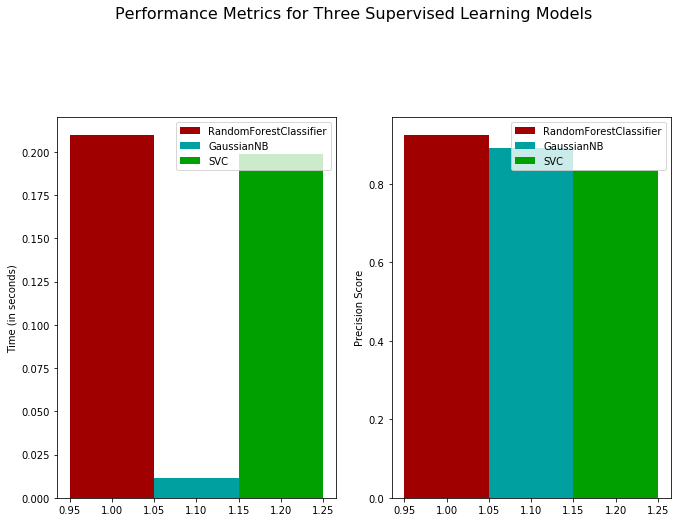

In [228]:
def vis(results):
    fig, ax = pl.subplots(1,2, figsize = (11,7))
    n_groups = 1
    ind = 1
    bar_width = 0.1
    colors = ['#A00000','#00A0A0','#00A000']    
    ax[0].set_ylabel("Time (in seconds)")
    ax[1].set_ylabel("Precision Score")
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
# 
    
    p1 = ax[0].bar(ind,results['RandomForestClassifier']['train_test_time'],bar_width,color = '#A00000',bottom = 0)
    p2 = ax[0].bar(ind+bar_width,results['GaussianNB']['train_test_time'],bar_width,color = '#00A0A0',bottom = 0)
    p3 = ax[0].bar(ind+2*bar_width,results['SVC']['train_test_time'],bar_width,color = '#00A000',bottom = 0)    
    ax[0].legend((p1,p2,p3),('RandomForestClassifier','GaussianNB','SVC'))
# 
    p1 = ax[1].bar(ind,results['RandomForestClassifier']['average_precision'],bar_width,color = '#A00000',bottom = 0)
    p2 = ax[1].bar(ind+bar_width,results['GaussianNB']['average_precision'],bar_width,color = '#00A0A0',bottom = 0)
    p3 = ax[1].bar(ind+2*bar_width,results['SVC']['average_precision'],bar_width,color = '#00A000',bottom = 0)    
    ax[1].legend((p1,p2,p3),('RandomForestClassifier','GaussianNB','SVC'))

    pl.show() 
    
vis(results)

## Feature Extraction

In [229]:
from sklearn.ensemble import RandomForestRegressor

In [234]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)
importances = model.feature_importances_ 
len(importances)
len(features)

36

In [251]:
dic = {}
for i in range(len(importances)):
    dic[importances[i]] = features[i]
#     dic[features[i]] = importances[i]
# dic.items()
keys = list(dic.keys())
keys.sort(reverse=True)
keys[:5]
columns = []
for k in keys[:5]:
    columns.append(dic[k])
columns

['50-Day Moving Average',
 'Enterprise Value/Revenue',
 'Forward P/E',
 'Trailing P/E',
 'Beta']

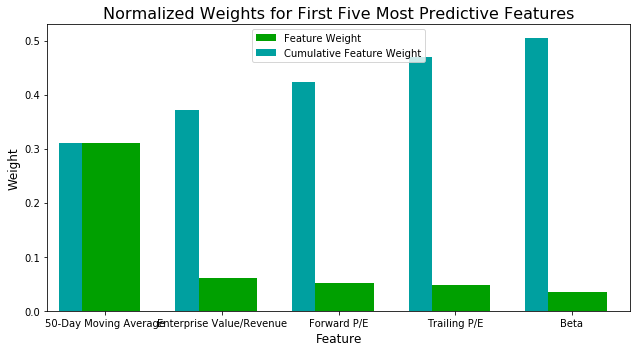

In [253]:
def feature_plot(importances, X_train, y_train,columns):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
#     columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  
feature_plot(importances,X_train,Y_train,columns)